<a href="https://colab.research.google.com/github/stger040/Financial-Prediction/blob/main/Skillshare_Financial_Prediction.ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Retrieving the data

Download it [manually](https://www.kaggle.com/mczielinski/bitcoin-historical-data) or retrieve the data with the API following the [documentation](https://www.kaggle.com/docs/api). The command would be:

`kaggle datasets download -d mczielinski/bitcoin-historical-data`

We have prepared some data that is easier to work with. You can retrieve it on [Github](https://github.com/JesperDramsch/skillshare-financial-prediction/raw/main/data/btc_hourly.csv).




# Data Loading

In [78]:
import pandas as pd

In [76]:
btc = pd.read_csv('https://github.com/stger040/financial-prediction/raw/main/data/btc_daily.csv')
btc['Timestamp'] = pd.to_datetime(btc.Timestamp)
btc.set_index('Timestamp', inplace=True)
btc.head()


,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31,4.465000,4.482500,4.465000,4.482500,23.829470,106.330084,4.471603
2012-01-01,4.806667,4.806667,4.806667,4.806667,7.200667,35.259720,4.806667
2012-01-02,5.000000,5.000000,5.000000,5.000000,19.048000,95.240000,5.000000
2012-01-03,5.252500,5.252500,5.252500,5.252500,11.004660,58.100651,5.252500
2012-01-04,5.200000,5.223333,5.200000,5.223333,11.914807,63.119577,5.208159


# Describe Data

In [15]:
btc.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31 07:00:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
2011-12-31 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 11:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
btc.tail()


,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2021-03-30 20:00:00,58686.619500,58717.499833,58649.440333,58678.720333,1.976271,116009.666363,58682.385127
2021-03-30 21:00:00,58703.792500,58718.812833,58688.192000,58709.001000,0.960084,56335.721540,58705.094588
2021-03-30 22:00:00,58788.743667,58806.029333,58770.925667,58788.207333,1.133653,66663.661684,58788.454429
2021-03-30 23:00:00,58667.730345,58681.061379,58655.068966,58668.632586,1.350504,79205.951112,58666.750127
2021-03-31 00:00:00,58767.750000,58778.180000,58755.970000,58778.180000,2.712831,159417.751000,58764.349363


## Columns/features in data


In [17]:
btc.columns


Index(['Open', 'High', 'Low', 'Close', 'Volume_(BTC)', 'Volume_(Currency)',
       'Weighted_Price'],
      dtype='object')

## Data information


In [18]:
btc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 81066 entries, 2011-12-31 07:00:00 to 2021-03-31 00:00:00
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Open               77534 non-null  float64
 1   High               77534 non-null  float64
 2   Low                77534 non-null  float64
 3   Close              77534 non-null  float64
 4   Volume_(BTC)       77534 non-null  float64
 5   Volume_(Currency)  77534 non-null  float64
 6   Weighted_Price     77534 non-null  float64
dtypes: float64(7)
memory usage: 4.9 MB


## Is there any missing values?


In [19]:
btc.isnull().values.any()


True

In [20]:
btc[btc.isnull().any(axis=1)].head()


,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 11:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
btc = btc[btc.index.year>2015].dropna()
btc


,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2016-01-01 00:00:00,431.571842,431.683947,431.350526,431.466842,1.087394,469.169648,431.486899
2016-01-01 01:00:00,430.470968,430.612258,430.317742,430.464194,1.006846,433.216050,430.461480
2016-01-01 02:00:00,431.021923,431.075385,430.962308,431.013462,0.471009,202.855008,430.992236
2016-01-01 03:00:00,431.493784,431.681892,431.373243,431.600811,2.026601,876.422114,431.577192
2016-01-01 04:00:00,434.310408,434.438163,434.135306,434.281633,17.771499,7719.402352,434.306570
...,...,...,...,...,...,...,...
2021-03-30 20:00:00,58686.619500,58717.499833,58649.440333,58678.720333,1.976271,116009.666363,58682.385127
2021-03-30 21:00:00,58703.792500,58718.812833,58688.192000,58709.001000,0.960084,56335.721540,58705.094588
2021-03-30 22:00:00,58788.743667,58806.029333,58770.925667,58788.207333,1.133653,66663.661684,58788.454429


In [22]:
btc.isnull().values.any()

False

## Data Description


In [23]:
btc.describe()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
count,45981.000000,45981.000000,45981.000000,45981.000000,45981.000000,4.598100e+04,45981.000000
mean,7896.779379,7902.375884,7890.926469,7896.768154,6.717475,5.316373e+04,7896.671885
std,9587.179188,9595.099166,9579.064379,9587.318156,7.858661,1.010684e+05,9586.880428
min,358.262414,358.673793,357.663276,358.174310,0.017548,5.522772e+01,358.134143
25%,1272.792778,1273.177778,1272.604722,1272.849167,2.323864,6.372295e+03,1272.834702
50%,6525.464898,6528.668085,6522.516863,6525.332041,4.391451,2.158347e+04,6525.162787
75%,9494.180333,9499.169000,9489.318833,9494.198333,8.216645,5.812929e+04,9494.596766
max,61365.363833,61406.334167,61325.110500,61370.448167,228.220477,4.125142e+06,61363.600604


# Statistical Test



In [79]:
import statsmodels.api as sm 
import matplotlib.pyplot as plt
import numpy as np


In [88]:
btc["Weighted_Price_log"] = np.log1p(btc.Weighted_Price)

<Figure size 1440x720 with 0 Axes>

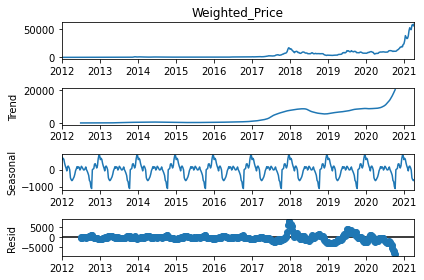

In [89]:
plt.figure(figsize=[20,10])
sm.tsa.seasonal_decompose(btc.resample("W").median().Weighted_Price).plot()
plt.show()


In [90]:
dickey = sm.tsa.stattools.adfuller(btc.resample("W").mean().Weighted_Price)


print(f'ADF Statistic: {dickey[0]:.2f}')
print(f'p-value: {dickey[1]:.2f}')
print('Critical Values:')
for key, value in dickey[4].items():
        print(f'\t {key}: {value:.3f}')
        

ADF Statistic: 2.52
p-value: 1.00
Critical Values:
	 1%: -3.444
	 5%: -2.868
	 10%: -2.570


<Figure size 1440x720 with 0 Axes>

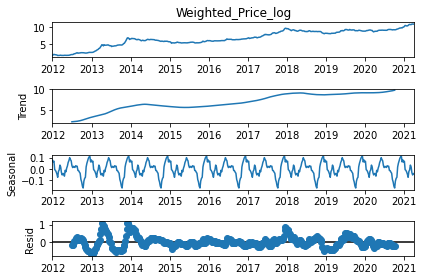

In [91]:
plt.figure(figsize=[20,10])
sm.tsa.seasonal_decompose(btc.resample("W").median().Weighted_Price_log).plot()
plt.show()


In [92]:
dickey = sm.tsa.stattools.adfuller(btc.resample("W").mean().Weighted_Price_log)


print(f'ADF Statistic: {dickey[0]:.2f}')
print(f'p-value: {dickey[1]:.2f}')
print('Critical Values:')
for key, value in dickey[4].items():
        print(f'\t {key}: {value:.3f}')
        

ADF Statistic: -0.97
p-value: 0.76
Critical Values:
	 1%: -3.444
	 5%: -2.868
	 10%: -2.570


# Validation


In [93]:
import datetime

from sklearn.model_selection import train_test_split, KFold, TimeSeriesSplit

[]

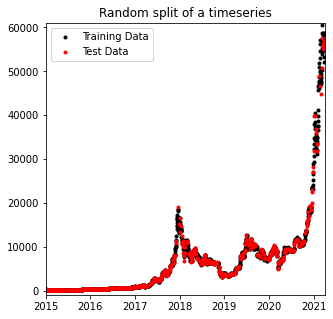

In [94]:
fig, axs = plt.subplots(figsize=[5, 5])

train, test = train_test_split(btc[["Weighted_Price"]])

axs.plot(train, 'k.', lw=1, label="Training Data")
axs.plot(test,'r.', lw=1, label="Test Data")
axs.set_xlim([datetime.date(2015, 1, 1), datetime.date(2021, 4, 1)])
axs.set_ylim([-900, 61000])
axs.set_title(f"Random split of a timeseries")
axs.legend()
plt.plot()


## K-Fold Cross-Validation

We can see that the data that is supposed to be "unseen" is sprinkled in between the training data. This does not have anything to do with forecasting anymore and only needs some simple interpolation. We need a better system!

Good machine learning validation is done using cross-validation, where the data is split into multiple subset and tested against each individually. KFold is the most common one that split the data into a number of `k` folds or subsets.

![Cross-Validation](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)
[[Source]](https://scikit-learn.org/stable/modules/cross_validation.html)

In [95]:
cv = KFold()
cv

KFold(n_splits=5, random_state=None, shuffle=False)

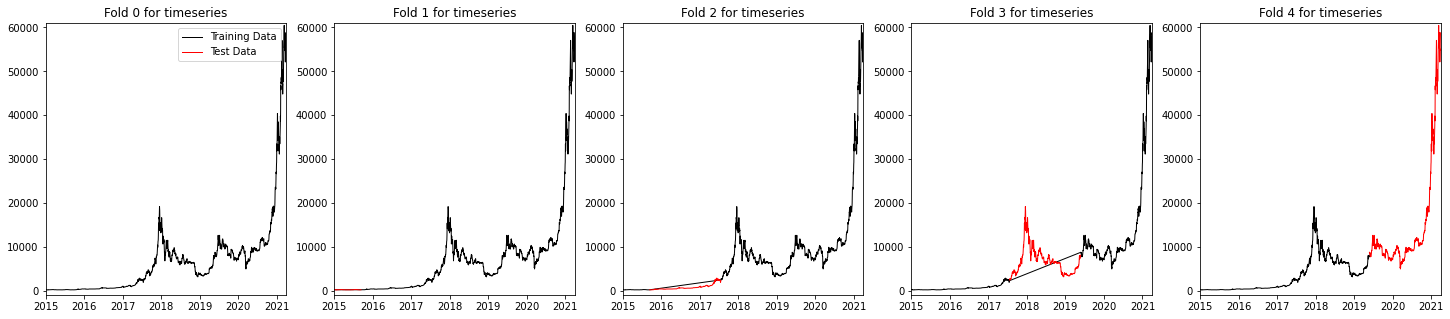

In [83]:
fig, axs = plt.subplots(ncols=5, figsize=[25, 5])

for i, (train_index, val_index) in enumerate(cv.split(btc.Weighted_Price)):
    axs[i].plot(btc.Weighted_Price[train_index], 'k', lw=1, label="Training Data")
    axs[i].plot(btc.Weighted_Price[val_index],'r', lw=1, label="Test Data")
    axs[i].set_xlim([datetime.date(2015, 1, 1), datetime.date(2021, 4, 1)])
    axs[i].set_ylim([-900, 61000])
    axs[i].set_title(f"Fold {i} for timeseries")
    if not i:
        axs[0].legend()
        plt.plot()


## Time-Series Cross-Validation

This is better, but still not ideal. Each fold is contained by other data. Due to the time dependency, we know the order of the data and the machine learning system will exploit this information. Therefore, a real time-series solution must be used. This one only uses future data for validation:

![Time Series Split](https://scikit-learn.org/stable/_images/sphx_glr_plot_cv_indices_013.png) [[Source]](https://scikit-learn.org/stable/modules/cross_validation.html#time-series-split)


Read more in the complimentary ebook [Understanding Machine Learning Validation](https://dramsch.net/books/).


In [96]:
tscv = TimeSeriesSplit()
tscv

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)

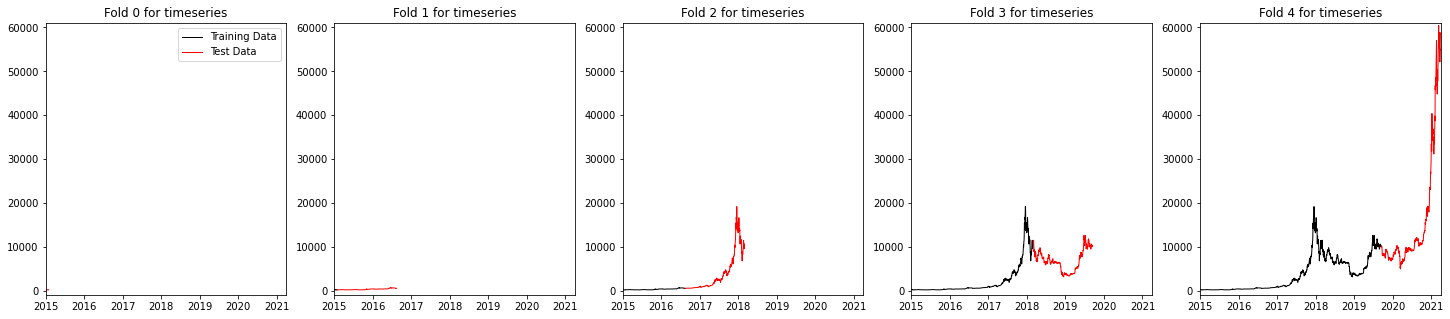

In [85]:
fig, axs = plt.subplots(ncols=5, figsize=[25, 5])

for i, (train_index, val_index) in enumerate(tscv.split(btc.Weighted_Price)):
    axs[i].plot(btc.Weighted_Price[train_index], 'k', lw=1, label="Training Data")
    axs[i].plot(btc.Weighted_Price[val_index],'r', lw=1, label="Test Data")
    axs[i].set_xlim([datetime.date(2015, 1, 1), datetime.date(2021, 4, 1)])
    axs[i].set_ylim([-900, 61000])
    axs[i].set_title(f"Fold {i} for timeseries")
    if not i:
        axs[0].legend()
        plt.plot()


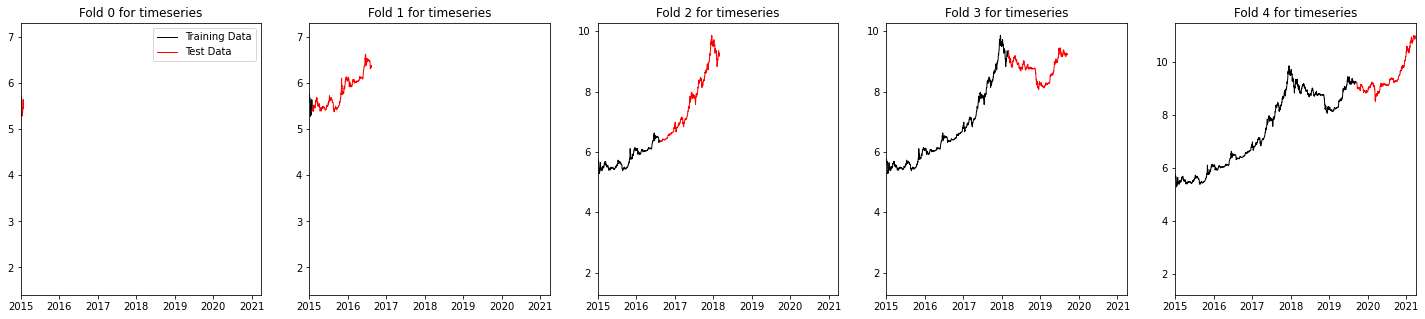

In [97]:
fig, axs = plt.subplots(ncols=5, figsize=[25, 5])

for i, (train_index, val_index) in enumerate(tscv.split(btc.Weighted_Price_log)):
    axs[i].plot(btc.Weighted_Price_log[train_index], 'k', lw=1, label="Training Data")
    axs[i].plot(btc.Weighted_Price_log[val_index],'r', lw=1, label="Test Data")
    axs[i].set_xlim([datetime.date(2015, 1, 1), datetime.date(2021, 4, 1)])
    #axs[i].set_ylim([-900, 61000])
    axs[i].set_title(f"Fold {i} for timeseries")
    if not i:
        axs[0].legend()
        plt.plot()


# Prepare Training data
## Classic Machine Learning

In [98]:
from sklearn.preprocessing import MinMaxScaler

In [99]:
split = int(btc.shape[0]*0.8)
df_train = btc[:split]
df_test = btc[split:]


In [100]:
def create_dataset(df, n, feature=0):
    x = []
    y = []

    for i in range(n, df.shape[0]):
        x.append(df[i-n:i, feature])
        y.append(df[i, feature])
    x = np.expand_dims(np.array(x), -1)
    y = np.expand_dims(np.array(y), -1)
    return x, y 

In [101]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(df_train)
dataset_train


array([[6.94971486e-06, 7.85580963e-06, 6.95784156e-06, ...,
        1.94649221e-04, 7.29524503e-06, 3.16397956e-03],
       [2.47583592e-05, 2.47392900e-05, 2.47873106e-05, ...,
        6.30274236e-05, 2.47630077e-05, 1.04224872e-02],
       [3.48354457e-05, 3.48086151e-05, 3.48761808e-05, ...,
        1.74110465e-04, 3.48419862e-05, 1.44224205e-02],
       ...,
       [4.01293771e-01, 4.01240116e-01, 4.01478711e-01, ...,
        8.31622302e-02, 4.01338435e-01, 8.88556585e-01],
       [4.15897814e-01, 4.15818387e-01, 4.16144268e-01, ...,
        9.64758923e-02, 4.15967045e-01, 8.92925807e-01],
       [4.19169340e-01, 4.19060213e-01, 4.19414005e-01, ...,
        3.49644851e-02, 4.19249134e-01, 8.93884985e-01]])

In [102]:
dataset_test = scaler.transform(df_test)


In [103]:
X_train, y_train = create_dataset(dataset_train,50,7)
X_test, y_test = create_dataset(dataset_test,50,7)


In [104]:
X_train.shape

(2653, 50, 1)

In [105]:
y_train.shape

(2653, 1)

## Prophet


In [106]:
df_train.reset_index(inplace=True)
df_prophet = pd.DataFrame(columns=["ds", "y"])
df_prophet["ds"] = df_train.Timestamp
df_prophet["y"] = df_train.Weighted_Price
df_prophet

,ds,y
0,2011-12-31,4.471603
1,2012-01-01,4.806667
2,2012-01-02,5.000000
3,2012-01-03,5.252500
4,2012-01-04,5.208159
...,...,...
2698,2019-05-21,7952.526758
2699,2019-05-22,7890.294526
2700,2019-05-23,7702.740478
2701,2019-05-24,7983.344117


In [46]:
df_test.reset_index(inplace=True)
df_prophet_test = pd.DataFrame(columns=["ds", "y"])
df_prophet_test["ds"] = df_test.Timestamp
df_prophet_test["y"] = df_test.Weighted_Price
df_prophet_test

,ds,y
0,2020-03-12 16:00:00,6049.065567
1,2020-03-12 17:00:00,6123.254776
2,2020-03-12 18:00:00,6081.036189
3,2020-03-12 19:00:00,6047.960700
4,2020-03-12 20:00:00,5871.514519
...,...,...
9192,2021-03-30 20:00:00,58682.385127
9193,2021-03-30 21:00:00,58705.094588
9194,2021-03-30 22:00:00,58788.454429
9195,2021-03-30 23:00:00,58666.750127


# Evaluation function


In [107]:
from sklearn.metrics import r2_score, mean_absolute_error

In [108]:
def evaluate_model(model, model_name="Model", test_data=X_test, target_data=y_test):
    y_pred_test = model.predict(test_data)

    try:
        y_pred_test = y_pred_test.yhat 
    except:
        pass

    test_rs = r2_score(target_data,y_pred_test)
    print('R Squared : ', round(test_rs,5))

    test_MAE = mean_absolute_error(target_data, y_pred_test)
    print('Mean Absolute Error: ', round(test_MAE, 5))

    plt.figure(figsize=(20,10))
    plt.plot(y_pred_test, color='green', marker='o', linestyle='dashed',label='Predicted Price')
    plt.plot(target_data, color='red', label='Actual Price')
    plt.title('Comparison of actual and predicted stock prices for ' + model_name)
    plt.xlabel('Day')
    plt.ylabel('Prices')
    plt.legend()
    plt.show()
    
    return test_rs, test_MAE

# SARIMA

- S: Seasonal
- AR: Auto Regressive model
- I: Integrated
- MA: Moving Average


In [49]:
sarima = sm.tsa.statespace.SARIMAX(btc.Weighted_Price[:split],
                                   order=(1, 1, 2),
                                   seasonal_order=(1, 1, 2, 12),
                                   enforce_stationarity=False,
                                   enforce_invertibility=False)

results = sarima.fit()
print("Time Series AIC: " + str(results.aic))


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Time Series AIC: 400700.8484673494


# Facebook Prophet

In [50]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [109]:
from prophet import Prophet

In [52]:
prophet = Prophet(changepoint_prior_scale=0.15, daily_seasonality=True)
prophet.fit(df_prophet)


DEBUG:cmdstanpy:input tempfile: /tmp/tmpmak50xqs/znuhehn6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmak50xqs/vg8vruzd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84990', 'data', 'file=/tmp/tmpmak50xqs/znuhehn6.json', 'init=/tmp/tmpmak50xqs/vg8vruzd.json', 'output', 'file=/tmp/tmp41nk_lg9/prophet_model-20220827033832.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:38:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:39:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [53]:
forecast = prophet.predict(df_prophet_test)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
9192,2021-03-30 20:00:00,20264.701568,-35146.789916,73652.863251,-33742.135435,75034.956764,-1806.525156,-1806.525156,-1806.525156,0.379279,...,5.144912,5.144912,5.144912,-1812.049348,-1812.049348,-1812.049348,0.0,0.0,0.0,18458.176411
9193,2021-03-30 21:00:00,20265.588817,-36454.932952,73782.590418,-33759.815330,75047.221792,-1803.014773,-1803.014773,-1803.014773,1.884260,...,4.819341,4.819341,4.819341,-1809.718374,-1809.718374,-1809.718374,0.0,0.0,0.0,18462.574044
9194,2021-03-30 22:00:00,20266.476067,-35171.814111,73545.797045,-33777.495225,75059.486820,-1798.932607,-1798.932607,-1798.932607,3.924785,...,4.526975,4.526975,4.526975,-1807.384368,-1807.384368,-1807.384368,0.0,0.0,0.0,18467.543460
9195,2021-03-30 23:00:00,20267.363317,-35815.940024,74122.758746,-33795.175121,75071.751848,-1794.907631,-1794.907631,-1794.907631,5.873928,...,4.265802,4.265802,4.265802,-1805.047361,-1805.047361,-1805.047361,0.0,0.0,0.0,18472.455686
9196,2021-03-31 00:00:00,20268.250567,-36031.043136,73739.589706,-33812.855016,75084.016876,-1792.002037,-1792.002037,-1792.002037,6.672443,...,4.032905,4.032905,4.032905,-1802.707385,-1802.707385,-1802.707385,0.0,0.0,0.0,18476.248530


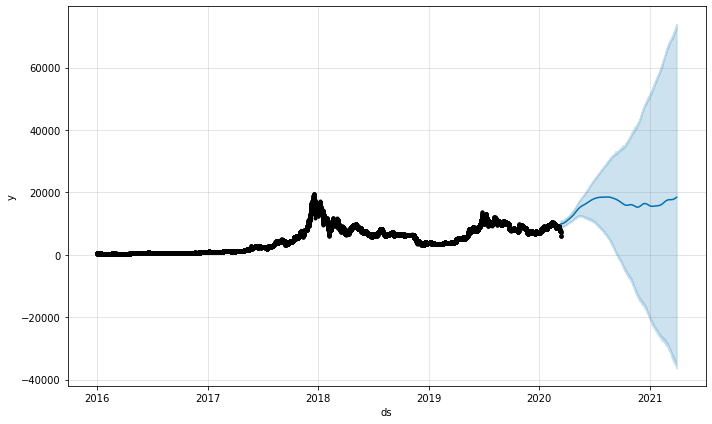

In [54]:
fig = prophet.plot(forecast)


R Squared :  0.01285
Mean Absolute Error:  10972.32542


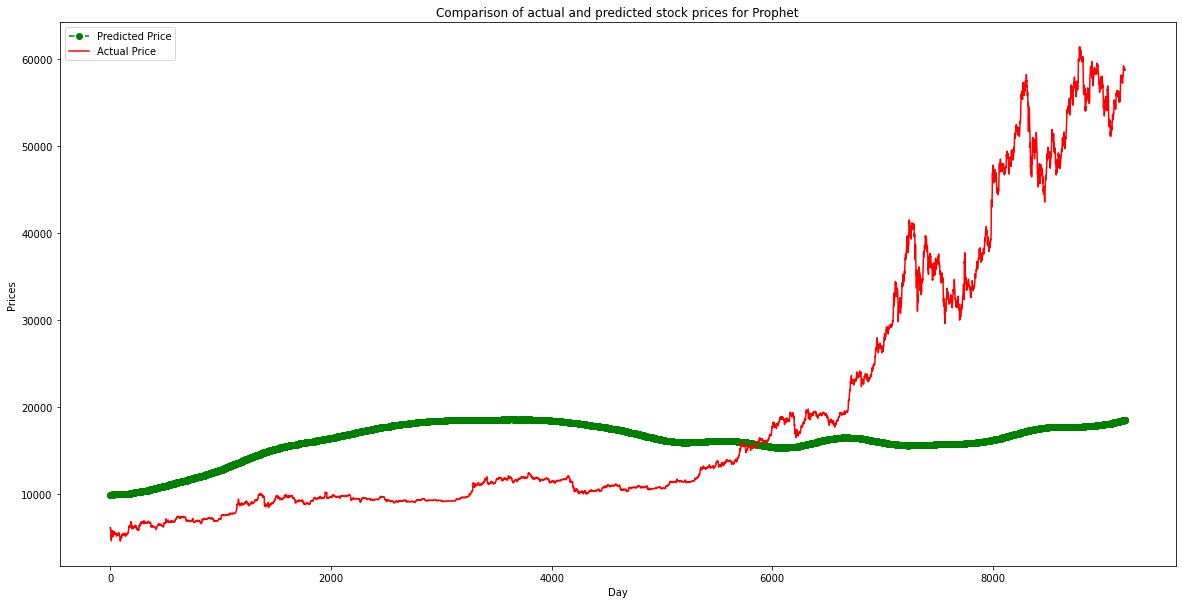

(0.012849715445486853, 10972.325419404053)

In [55]:
evaluate_model(prophet, "Prophet", df_prophet_test, df_prophet_test.y)

# XGBoost


In [110]:
import xgboost

In [57]:
xgb_model = xgboost.XGBRegressor()
xgb_model.fit(np.squeeze(X_train), np.squeeze(y_train))


[03:39:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

R Squared :  0.60969
Mean Absolute Error:  0.0523


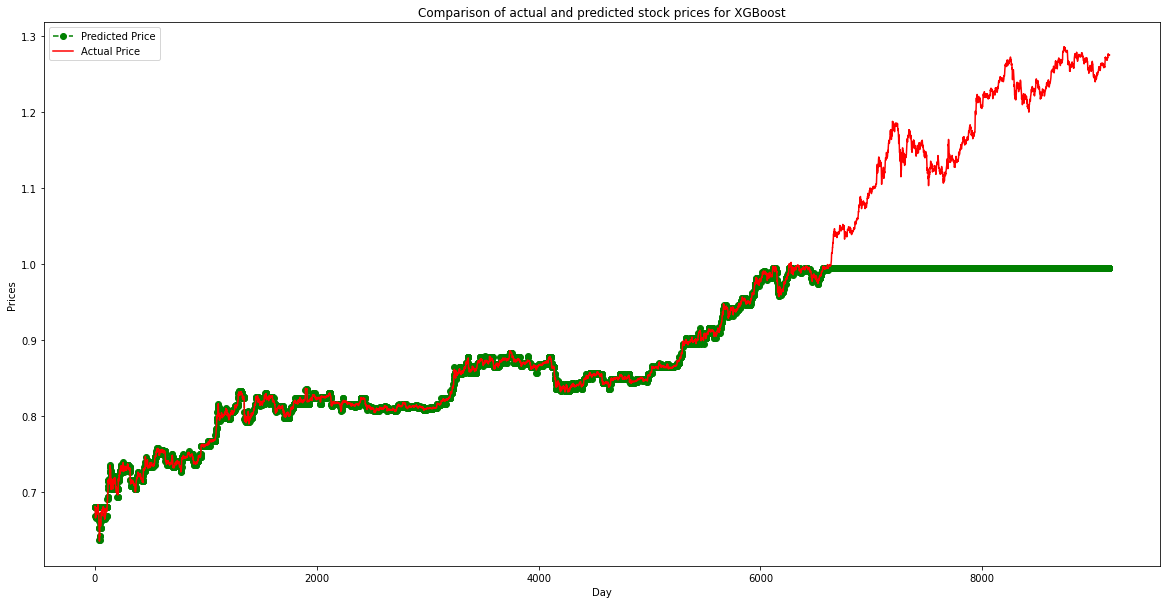

(0.6096859276083624, 0.05229789296474891)

In [58]:
evaluate_model(xgb_model, model_name="XGBoost", test_data=np.squeeze(X_test), target_data=np.squeeze(y_test))


# LSTM


In [111]:
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Conv1D, MaxPooling1D, Flatten, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import MSE
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.activations import relu

In [60]:
LSTM_Model = Sequential()


In [61]:
LSTM_Model.add(LSTM(units=96,
                    return_sequences=True,
                    input_shape=(X_train.shape[1], 1)))
LSTM_Model.add(Dropout(0.2))
LSTM_Model.add(LSTM(units=96, 
                    return_sequences=True))
LSTM_Model.add(Dropout(0.2))
LSTM_Model.add(LSTM(units=96, 
                    return_sequences=True))
LSTM_Model.add(Dropout(0.2))
LSTM_Model.add(LSTM(units=96))
LSTM_Model.add(Dropout(0.2))
LSTM_Model.add(Dense(units=1))

In [62]:
LSTM_Model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 96)            37632     
                                                                 
 dropout (Dropout)           (None, 50, 96)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50, 96)            74112     
                                                                 
 dropout_1 (Dropout)         (None, 50, 96)            0         
                                                                 
 lstm_2 (LSTM)               (None, 50, 96)            74112     
                                                                 
 dropout_2 (Dropout)         (None, 50, 96)            0         
                                                                 
 lstm_3 (LSTM)               (None, 96)                7

In [63]:
LSTM_Model.compile(loss=MSE, optimizer=Adam())


In [64]:
LSTM_Model.fit(X_train,y_train,batch_size=32,epochs=10,verbose=1,validation_split=0.05)

Epoch 1/10
1091/1091 [==============================] - 29s 17ms/step - loss: 0.0026 - val_loss: 2.7452e-04
Epoch 2/10
1091/1091 [==============================] - 16s 15ms/step - loss: 0.0011 - val_loss: 2.9177e-05
Epoch 3/10
1091/1091 [==============================] - 16s 15ms/step - loss: 8.5903e-04 - val_loss: 6.6974e-05
Epoch 4/10
1091/1091 [==============================] - 16s 15ms/step - loss: 7.1261e-04 - val_loss: 2.4865e-05
Epoch 5/10
1091/1091 [==============================] - 16s 15ms/step - loss: 6.1580e-04 - val_loss: 5.5597e-05
Epoch 6/10
1091/1091 [==============================] - 16s 15ms/step - loss: 5.4739e-04 - val_loss: 1.2504e-04
Epoch 7/10
1091/1091 [==============================] - 16s 15ms/step - loss: 4.8533e-04 - val_loss: 2.2948e-04
Epoch 8/10
1091/1091 [==============================] - 16s 14ms/step - loss: 4.6358e-04 - val_loss: 2.0581e-05
Epoch 9/10
1091/1091 [==============================] - 16s 15ms/step - loss: 4.4120e-04 - val_loss: 1.7022e-04


R Squared :  0.94104
Mean Absolute Error:  0.03115


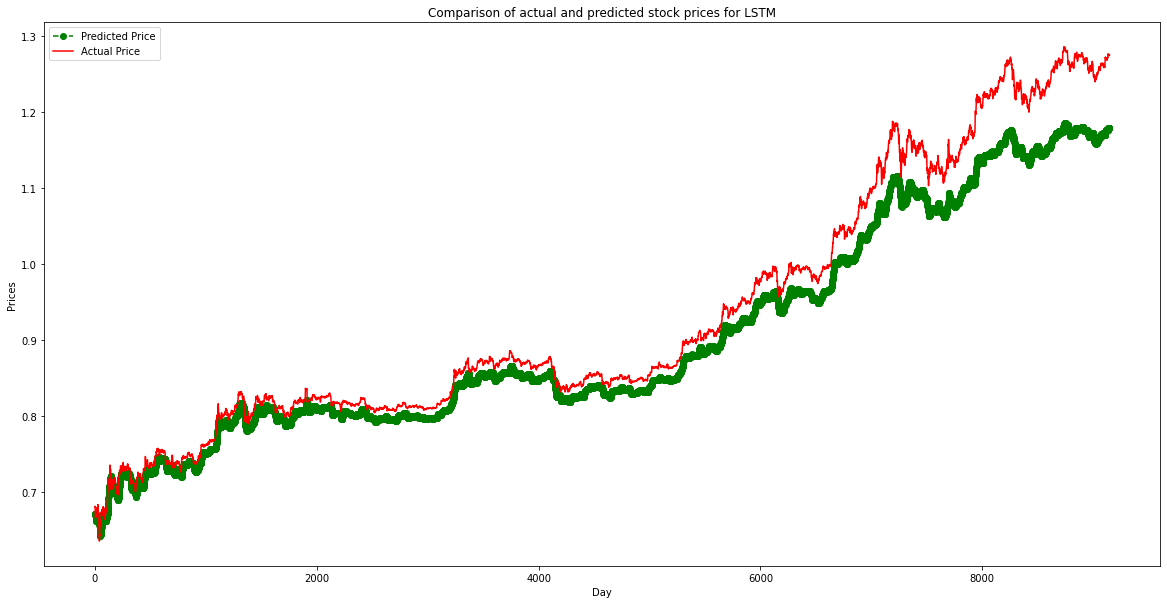

(0.941035990697969, 0.031153884063177685)

In [65]:
evaluate_model(LSTM_Model, "LSTM")


# Convolutional Neural Network


In [66]:
CNN_model=Sequential()

In [67]:
CNN_model.add(Conv1D(filters=16, kernel_size=3, activation='relu', input_shape=X_train[0].shape))
CNN_model.add(MaxPooling1D(3))
CNN_model.add(Dropout(0.1))
CNN_model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
CNN_model.add(MaxPooling1D(3))
CNN_model.add(Dropout(0.1))
CNN_model.add(Flatten())
CNN_model.add(Dense(32, activation='relu'))
CNN_model.add(Dense(1, activation='relu'))


In [68]:
CNN_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 48, 16)            64        
                                                                 
 max_pooling1d (MaxPooling1D  (None, 16, 16)           0         
 )                                                               
                                                                 
 dropout_4 (Dropout)         (None, 16, 16)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 14, 32)            1568      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 4, 32)            0         
 1D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 4, 32)            

In [69]:
CNN_model.compile(optimizer='adam', loss='mse')


In [70]:
CNN_model.fit(X_train, y_train, epochs=20, validation_split=0.1)


Epoch 1/20
1034/1034 [==============================] - 13s 4ms/step - loss: 0.0026 - val_loss: 0.0137
Epoch 2/20
1034/1034 [==============================] - 4s 4ms/step - loss: 4.7127e-04 - val_loss: 0.0114
Epoch 3/20
1034/1034 [==============================] - 4s 4ms/step - loss: 3.4795e-04 - val_loss: 0.0066
Epoch 4/20
1034/1034 [==============================] - 4s 4ms/step - loss: 2.6582e-04 - val_loss: 0.0053
Epoch 5/20
1034/1034 [==============================] - 4s 3ms/step - loss: 2.1781e-04 - val_loss: 0.0020
Epoch 6/20
1034/1034 [==============================] - 4s 3ms/step - loss: 1.7993e-04 - val_loss: 0.0025
Epoch 7/20
1034/1034 [==============================] - 4s 3ms/step - loss: 1.6765e-04 - val_loss: 0.0021
Epoch 8/20
1034/1034 [==============================] - 4s 4ms/step - loss: 1.5425e-04 - val_loss: 0.0025
Epoch 9/20
1034/1034 [==============================] - 4s 4ms/step - loss: 1.5152e-04 - val_loss: 9.9478e-04
Epoch 10/20
1034/1034 [======================

R Squared :  0.88679
Mean Absolute Error:  0.05109


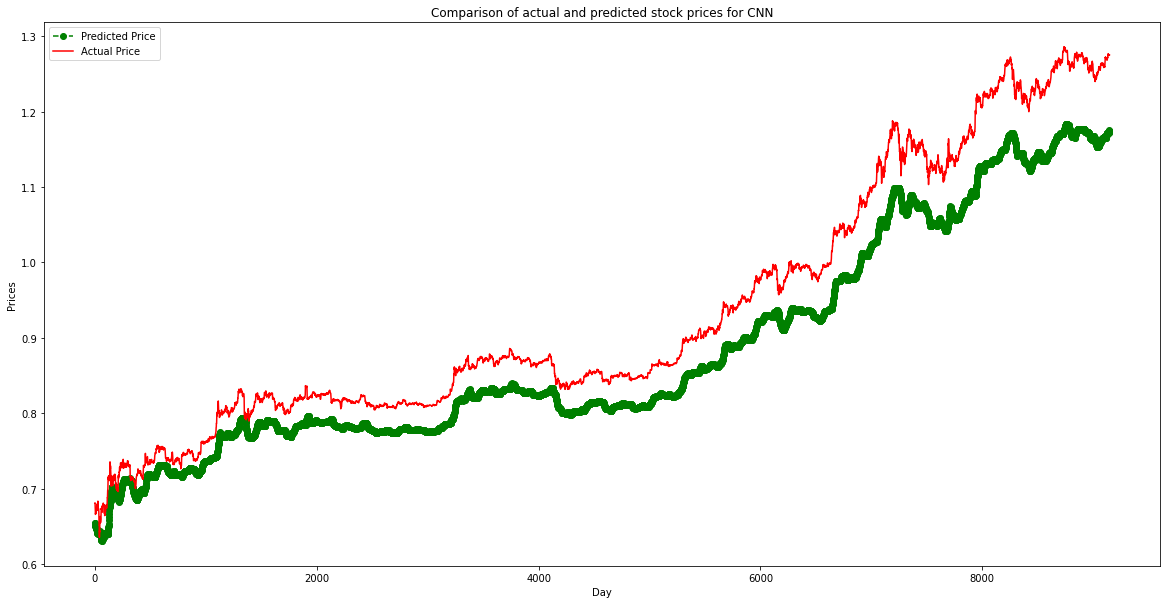

(0.8867939984139572, 0.05109414281636973)

In [71]:
evaluate_model(CNN_model, "CNN")


# Neural Prophet


In [72]:
!pip install neuralprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [73]:
from neuralprophet import NeuralProphet

In [74]:
neuralprophet = NeuralProphet()
neuralprophet.fit(df_prophet, freq="H")


INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.997% of the data.
INFO:NP.df_utils:Major frequency H corresponds to 99.997% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
INFO:NP.df_utils:Defined frequency is equal to major frequency - H
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 64
INFO:NP.config:Auto-set batch_size to 64
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 74
INFO:NP.config:Auto-set epochs to 74


  0%|          | 0/164 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 8.09E-02, min: 1.33E+00
INFO:NP.utils_torch:lr-range-test results: steep: 8.09E-02, min: 1.33E+00


  0%|          | 0/164 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 8.09E-02, min: 1.71E+00
INFO:NP.utils_torch:lr-range-test results: steep: 8.09E-02, min: 1.71E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 8.68E-02
INFO:NP.forecaster:lr-range-test selected learning rate: 8.68E-02
Epoch[7/74]:   9%|▉         | 7/74 [00:09<01:32,  1.39s/it, SmoothL1Loss=0.00792, MAE=953, RMSE=1.35e+3, RegLoss=0]


KeyboardInterrupt: ignored

In [ ]:
neural_forecast = neuralprophet.predict(df_prophet_test)
neural_forecast.tail()


In [ ]:
neuralprophet.plot(neural_forecast)


In [ ]:
evaluate_model(prophet, "Prophet", df_prophet_test, df_prophet_test.y)

#Unseen Data Test

In [114]:
btc_new = pd.read_csv('https://raw.githubusercontent.com/stger040/Financial-Prediction/main/data/BTC-USD%20(1).csv')

In [117]:
btc_new['Timestamp'] = pd.to_datetime(btc_new.Date)
btc_new.set_index('Timestamp', inplace=True)
btc_new.drop(["Date"], axis='columns', inplace=True)
btc_new.head()

,Open,High,Low,Close,Adj Close,Volume
Timestamp,,,,,,
2022-02-26,39213.082031,40005.347656,38702.535156,39105.148438,39105.148438,17467554129
2022-02-27,39098.699219,39778.941406,37268.976563,37709.785156,37709.785156,23450127612
2022-02-28,37706.000000,43760.457031,37518.214844,43193.234375,43193.234375,35690014104
2022-03-01,43194.503906,44793.601563,42952.585938,44354.636719,44354.636719,32479047645
2022-03-02,44357.617188,45077.578125,43432.851563,43924.117188,43924.117188,29183112630


In [118]:
btc_new['Open_log'] = np.log1p(btc_new.Open)
btc_new['Open_log_'] = np.log1p(btc_new.Open)
btc_new.tail()

,Open,High,Low,Close,Adj Close,Volume,Open_log,Open_log_
Timestamp,,,,,,,,
2022-08-23,21401.044922,21646.203125,20955.138672,21528.087891,21528.087891,31878280659,9.971242,9.971242
2022-08-24,21526.455078,21783.076172,21195.005859,21395.019531,21395.019531,31962253368,9.977084,9.977084
2022-08-25,21395.458984,21789.636719,21362.441406,21600.904297,21600.904297,31028679593,9.970981,9.970981
2022-08-26,21596.085938,21804.908203,20199.482422,20260.019531,20260.019531,42326789564,9.980314,9.980314
2022-08-27,20236.427734,20334.722656,20192.054688,20227.015625,20227.015625,43315871744,9.915289,9.915289


In [120]:
dataset_test_2 = scaler.transform(btc_new)

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Adj Close
- Open_log
- Open_log_
- Volume
Feature names seen at fit time, yet now missing:
- Volume_(BTC)
- Volume_(Currency)
- Weighted_Price
- Weighted_Price_log

  warnings.warn(message, FutureWarning)

Feature names unseen at fit time:
- Adj Close
- Open_log
- Open_log_
- Volume
Feature names seen at fit time, yet now missing:
- Volume_(BTC)
- Volume_(Currency)
- Weighted_Price
- Weighted_Price_log

  warnings.warn(message, FutureWarning)



In [121]:
X_test_2, y_test_2 = create_dataset(dataset_test_2,50,0)

R Squared :  0.52734
Mean Absolute Error:  0.17819


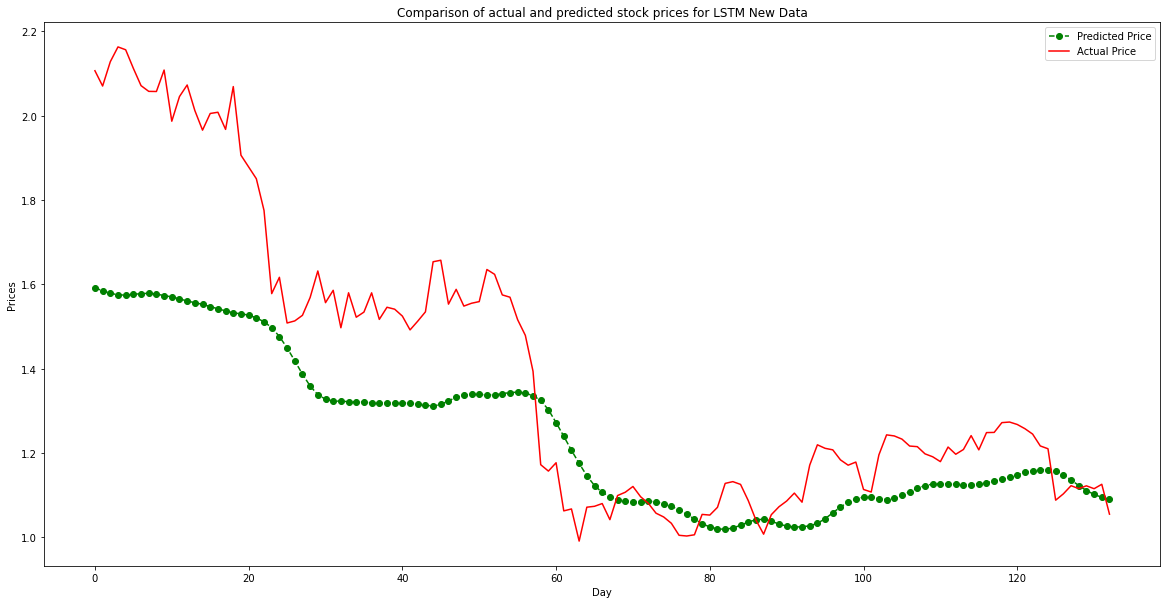

(0.5273426383067706, 0.17819132125178166)

In [122]:
evaluate_model(LSTM_Model, "LSTM New Data", X_test_2, y_test_2)